In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn import preprocessing
import statsmodels.api as sm
import scipy.stats as stats
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=12,8

In [8]:
np.random.seed(0)
x=np.array([i*np.pi/180 for i in range(60,300,4)])
data=pd.DataFrame(x,columns=['x'])
for i in range(2,16):
    colname='x_%d'%i
    data[colname]=data['x']**i
print(data.head())

          x       x_2       x_3       x_4       x_5       x_6       x_7  \
0  1.047198  1.096623  1.148381  1.202581  1.259340  1.318778  1.381021   
1  1.117011  1.247713  1.393709  1.556788  1.738948  1.942424  2.169709   
2  1.186824  1.408551  1.671702  1.984016  2.354677  2.794587  3.316683   
3  1.256637  1.579137  1.984402  2.493673  3.133642  3.937850  4.948448   
4  1.326450  1.759470  2.333850  3.095735  4.106339  5.446854  7.224981   

        x_8        x_9       x_10       x_11       x_12       x_13       x_14  \
0  1.446202   1.514459   1.585938   1.660790   1.739176   1.821260   1.907219   
1  2.423588   2.707173   3.023942   3.377775   3.773011   4.214494   4.707635   
2  3.936319   4.671717   5.544505   6.580351   7.809718   9.268760  11.000386   
3  6.218404   7.814277   9.819710  12.339811  15.506664  19.486248  24.487142   
4  9.583578  12.712139  16.862020  22.366630  29.668222  39.353420  52.200353   

        x_15  
0   1.997235  
1   5.258479  
2  13.055521  
3 

In [9]:
y_1=np.cos(1.2*x+np.random.normal(0,0.2,len(x)))
data['y_1']=y_1
data.head()

,x,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,y_1
0,1.047198,1.096623,1.148381,1.202581,1.259340,1.318778,1.381021,1.446202,1.514459,1.585938,1.660790,1.739176,1.821260,1.907219,1.997235,-0.038642
1,1.117011,1.247713,1.393709,1.556788,1.738948,1.942424,2.169709,2.423588,2.707173,3.023942,3.377775,3.773011,4.214494,4.707635,5.258479,0.149786
2,1.186824,1.408551,1.671702,1.984016,2.354677,2.794587,3.316683,3.936319,4.671717,5.544505,6.580351,7.809718,9.268760,11.000386,13.055521,-0.049120
3,1.256637,1.579137,1.984402,2.493673,3.133642,3.937850,4.948448,6.218404,7.814277,9.819710,12.339811,15.506664,19.486248,24.487142,30.771450,-0.375881
4,1.326450,1.759470,2.333850,3.095735,4.106339,5.446854,7.224981,9.583578,12.712139,16.862020,22.366630,29.668222,39.353420,52.200353,69.241170,-0.384306


Modified data with non-linear features

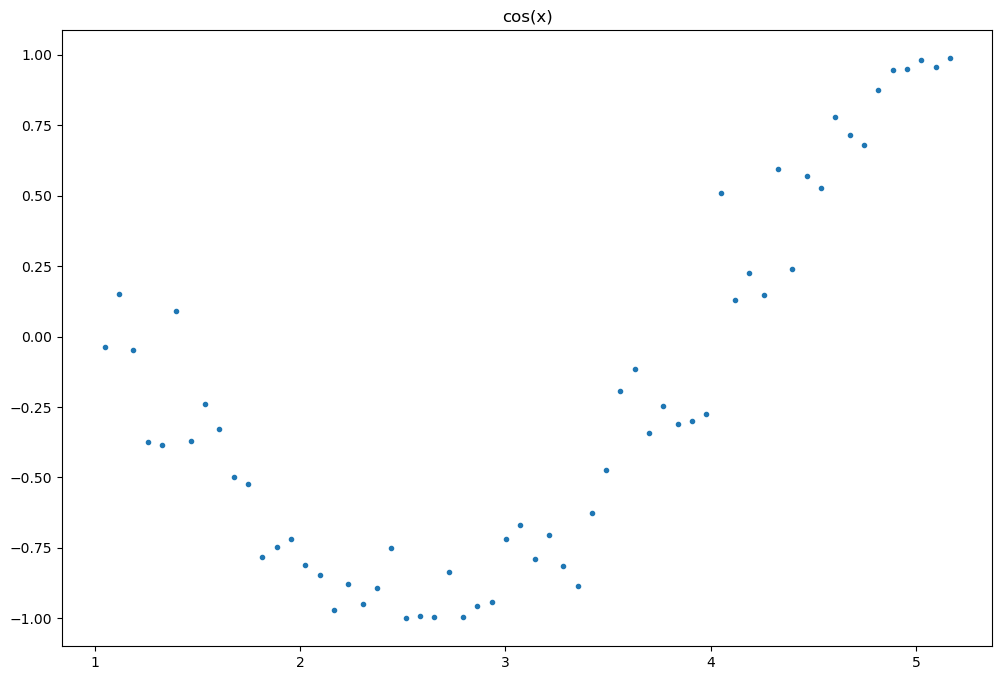

In [10]:
plt.title("cos(x)")
plt.plot(data['x'],data['y_1'],'.')

$x, x^2, x^3,.....x^{15}$

In [11]:
for i in range(2,16): #power of 1 is already there
    colname='x_%d'%i
    data[colname]=data['x']**i
print(data.head())

          x       x_2       x_3       x_4       x_5       x_6       x_7  \
0  1.047198  1.096623  1.148381  1.202581  1.259340  1.318778  1.381021   
1  1.117011  1.247713  1.393709  1.556788  1.738948  1.942424  2.169709   
2  1.186824  1.408551  1.671702  1.984016  2.354677  2.794587  3.316683   
3  1.256637  1.579137  1.984402  2.493673  3.133642  3.937850  4.948448   
4  1.326450  1.759470  2.333850  3.095735  4.106339  5.446854  7.224981   

        x_8        x_9       x_10       x_11       x_12       x_13       x_14  \
0  1.446202   1.514459   1.585938   1.660790   1.739176   1.821260   1.907219   
1  2.423588   2.707173   3.023942   3.377775   3.773011   4.214494   4.707635   
2  3.936319   4.671717   5.544505   6.580351   7.809718   9.268760  11.000386   
3  6.218404   7.814277   9.819710  12.339811  15.506664  19.486248  24.487142   
4  9.583578  12.712139  16.862020  22.366630  29.668222  39.353420  52.200353   

        x_15       y_1  
0   1.997235 -0.038642  
1   5.258479

this resembles a cos curve but not exactly because of the noise

### 1 Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression

Text(0.5, 1.0, 'Plot for Simple Linear Regression')

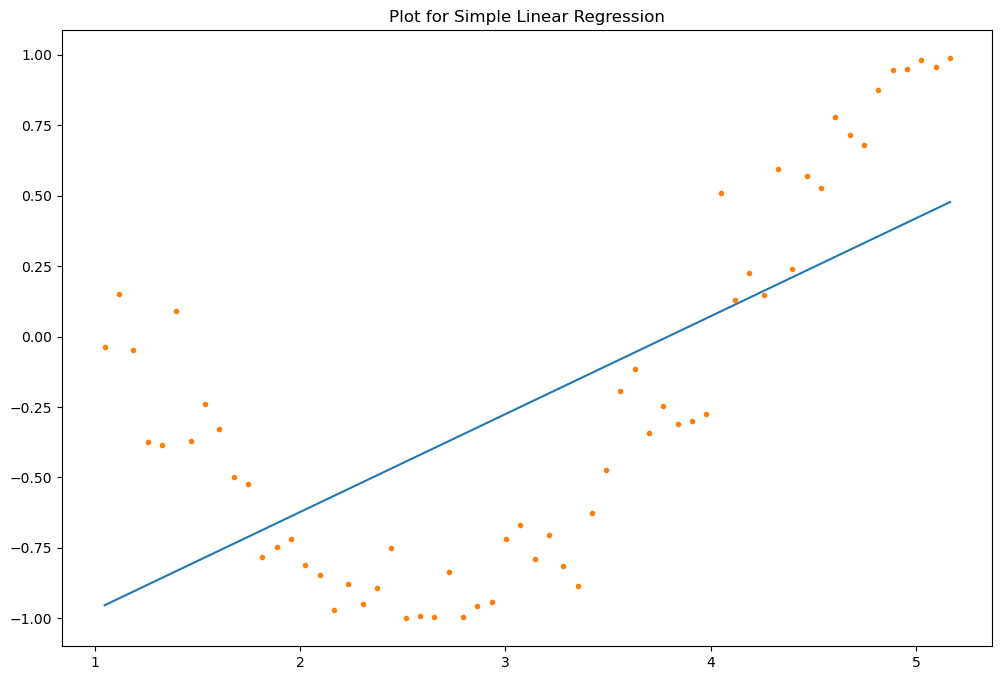

In [13]:
linReg= LinearRegression()
linReg.fit(data[['x']],data['y_1'])
y_pred=linReg.predict(data[['x']])

plt.plot(data['x'],y_pred)
plt.plot(data['x'],data['y_1'],'.')
plt.title('Plot for Simple Linear Regression')

### 1.1 Linear Regression with non-linear features

#### Model:Y_pred=$W_1X+W_2X^2+W_3X^3+........B$

In [14]:
def linear_regression(data,power,models_to_plot):
    predictors=['x']
    if  power >=2:
        predictors.extend(['x_%d'%i for i in range (2,power+1)])
        # fit the model
    linreg=LinearRegression()
    linreg.fit(data[predictors],data['y_1'])
    y_pred=linreg.predict(data[predictors])
    # check if a plot is to be made for the given power of features 
    if power in models_to_plot:
        x,y,z=models_to_plot[power]
        plt.subplot(x,y,z)
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y_1'],'.')
        plt.title('plot for power:%d'%power)
        plt.subplot(x,y,z+1)
        plt.tight_layout()
        xlen=np.arange(y_pred.shape[0])
        plt.plot(xlen,0*xlen,"-")
        plt.title("Residual Plot")
        ax=plt.subplot(x,y,z+2)
        plt.tight_layout()
        sm.qqplot(data['y_1']-y_pred,line='45',fit=True,dist=stats.norm,ax=ax)
        plt.title('Q-Q Plot')
        #Return the result in pre-defined format
        rss=sum((y_pred-data['y_1'])**2)
        rss=[rss]
        rss.extend([linreg.intercept_])
        rss.extend(linreg.coef_)
        return rss
     

Here RSS refers to the "Residual Sum of Square", which is nothing but the sum of squares of errors between the predicted and the actual values in the training data set and is known as the cost function or the loss function.
###### NOTE: A residual is a measure of how far away a point is vertically from the regression line. Simply it is the error between a predicted value and the observed actual value. Residual =y-$\hat{y}$

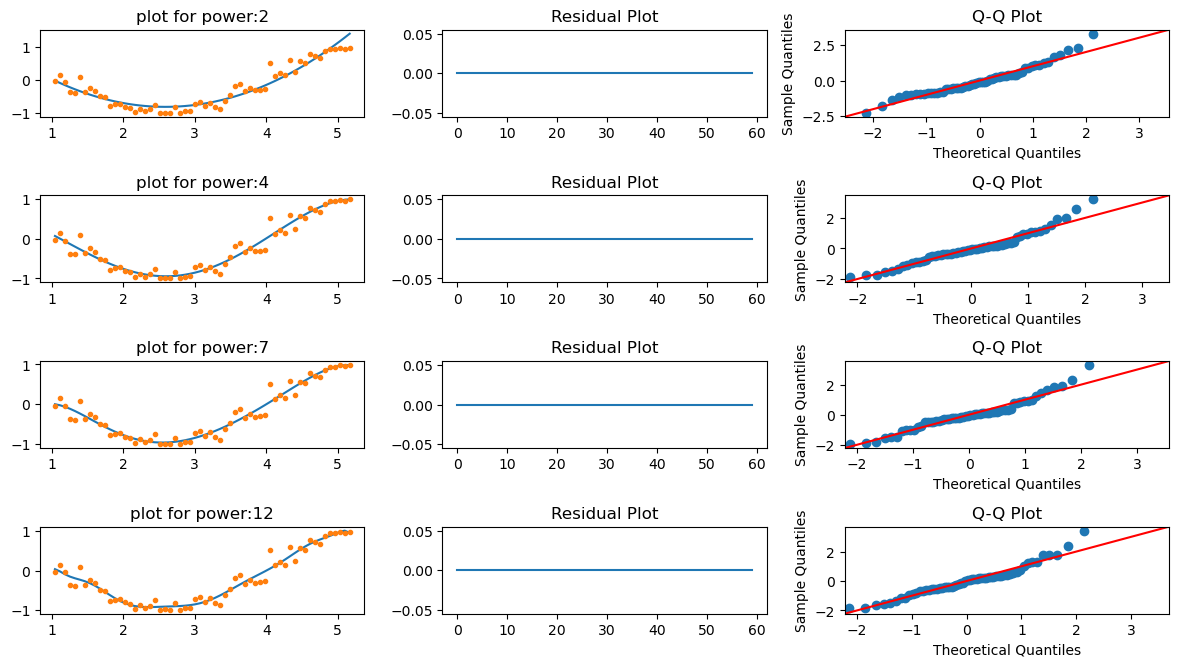

In [15]:
#initialize a dataframe to store the results:
col=['rss','intercept']+['coef_x%d'%i for i in range(1,16)]
ind=['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple=pd.DataFrame(index=ind,columns=col)
# define the powers for which a plot is required:
models_to_plot = {2: (5, 3, 1), 4: (5, 3, 4), 7: (5, 3, 7), 12: (5, 3, 10), 25: (5, 3, 13)}
# Iterate through all powers and assimillate results
for i in range(1,16):
    coef_matrix_simple.iloc[i-1,0:i+2]=linear_regression(data,power=i,models_to_plot=models_to_plot)

In [16]:
pd.options.display.float_format='{:,.2g}'.format
coef_matrix_simple

,rss,intercept,coef_x1,coef_x2,coef_x3,coef_x4,coef_x5,coef_x6,coef_x7,coef_x8,coef_x9,coef_x10,coef_x11,coef_x12,coef_x13,coef_x14,coef_x15
model_pow_1,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,2.1,1.4,-1.7,0.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,1.2,0.47,0.59,-1.4,0.48,-0.045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,1.1,-4.2,12,-12,5.1,-1.1,0.12,-0.0033,-0.00025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN


#### 2 Ridge Regression

In [17]:
from sklearn.linear_model import Ridge
def ridge_regression(data,predictors,alpha,models_to_plot={}):
  #Normalise
  dataX=preprocessing.normalize(data[predictors])
  #Fit the model
  ## Ridge =LinearModel+\alpha*||W||_2^2
  ridgereg=Ridge(alpha=alpha)
  ridgereg.fit(dataX,data['y_1'])
  y_pred=ridgereg.predict(dataX)
  # Check if a plot is to be made for the entered alpha
  if alpha in models_to_plot:
    x,y,z=models_to_plot[alpha]
    plt.subplot(x,y,z)
    plt.tight_layout()
    plt.plot(data['x'],y_pred)
    plt.plot(data['x'],data['y_1'],'.')
    plt.title('Plot for alpha:%.3g'%alpha)
    plt.subplot(x,y,z+1)
    plt.tight_layout()
    xlen=np.arange(y_pred.shape[0])
    plt.plot(xlen,data['y_1']-y_pred,"*")
    plt.plot(xlen,0*xlen,"-")
    plt.title("Residual Plot")
    ax=plt.subplot(x,y,z+2)
    plt.tight_layout()
    sm.qqplot(data['y_1']-y_pred,line='45',fit=True,dist=stats.norm,ax=ax)
    plt.title('Q-Q Plot')
    # Return the result in pre-defined format
    rss=sum((y_pred-data['y_1'])**2)
    ret=[rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.50757e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


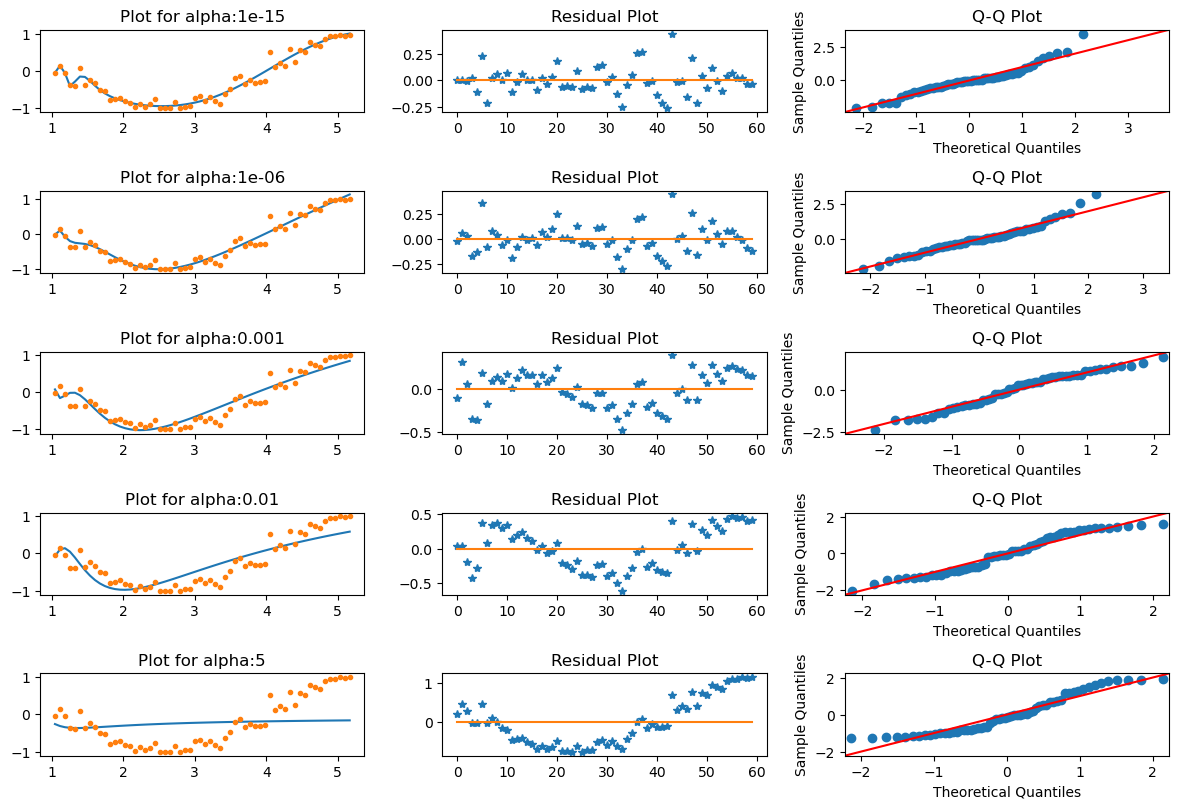

In [18]:
#initialize predictors to be set of 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range (2,16)])
#Set the different values of alpha to be tested
alpha_ridge=[1e-15,1e-6,1e-3,1e-2,5]
#Initialise the dataframe for storing coefficients.
col=['rss','intercept']+['coef_x%d'%i for i in range(1,16)]
ind=['alpha_%.2g'%alpha_ridge[i] for i in range (len(alpha_ridge))]
coef_matrix_ridge=pd.DataFrame(index=ind,columns=col)
models_to_plot={1e-15:(5,3,1),1e-6:(5,3,4),1e-3:(5,3,7),1e-2:(5,3,10),5:(5,3,13)}
for i in range(len(alpha_ridge)):
    coef_matrix_ridge.iloc[i,]=ridge_regression(data,predictors,alpha_ridge[i],models_to_plot)

In [19]:
pd.options.display.float_format='{:,.2g}'.format
coef_matrix_ridge

,rss,intercept,coef_x1,coef_x2,coef_x3,coef_x4,coef_x5,coef_x6,coef_x7,coef_x8,coef_x9,coef_x10,coef_x11,coef_x12,coef_x13,coef_x14,coef_x15
alpha_1e-15,0.97,-9.7e+03,-7.8e+04,3e+05,-1.6e+05,-2.2e+05,3.3e+04,2.4e+05,6.7e+04,-2.5e+05,-7.3e+04,3.5e+05,-2.8e+05,1.2e+05,-2.1e+04,3.2e+03,9.5e+03
alpha_1e-06,1.2,-33,3.6,16,17,12,4.4,1.3,5.6,13,12,-9.3,-37,-5,1.1e+02,-57,42
alpha_0.001,2.5,8.1,1.3,1.2,0.73,-0.19,-1.6,-3.5,-5.7,-7.8,-8.5,-6,1.4,13,14,-24,-3.5
alpha_0.01,5.3,3.5,-0.85,-1.1,-1.4,-1.8,-2.1,-2.3,-2.4,-2,-1,0.94,3.7,5.9,2.8,-12,-0.78
alpha_5,22,-0.13,0.02,0.022,0.025,0.027,0.03,0.033,0.036,0.038,0.036,0.027,-0.00088,-0.069,-0.21,-0.38,0.055


3. LASSO regression

In [20]:
from sklearn.linear_model import Lasso
def lasso_regression(data,predictors,alpha,model_to_plots={}):
    dataX=preprocessing.normalize(data[predictors])
    # fit the model
    ## Lasso=LinearModel+\alpha ||W||_1
    lassoreg=Lasso(alpha=alpha,max_iter=int(1e5))
    lassoreg.fit(dataX,data['y_1'])
    y_pred=lassoreg.predict(dataX)
    # check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        x,y,z=models_to_plot[alpha]
        plt.subplot(x,y,z)
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y_1'],'.')
        plt.title('Plot for alpha:%.3g'%alpha)
        plt.subplot(x,y,z+1)
        plt.tight_layout()
        xlen=np.arange(y_pred.shape[0])
        plt.plot(xlen,data['y_1']-y_pred,"*")
        plt.plot(xlen,0*xlen,"-")
        plt.title('Residual Plot')
        ax=plt.subplot(x,y,z+2)
        plt.tight_layout()
        sm.qqplot(data['y_1']-y_pred,line='45',fit=True,dist=stats.norm,ax=ax)
        plt.title('Q-Q Plot')
    #return the result in pre-defined format
    rss=sum((y_pred-data['y_1']**2))
    ret=[rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.963e-01, tolerance: 2.425e-03
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.445e-01, tolerance: 2.425e-03
  model = cd_fast.enet_coordinate_descent(


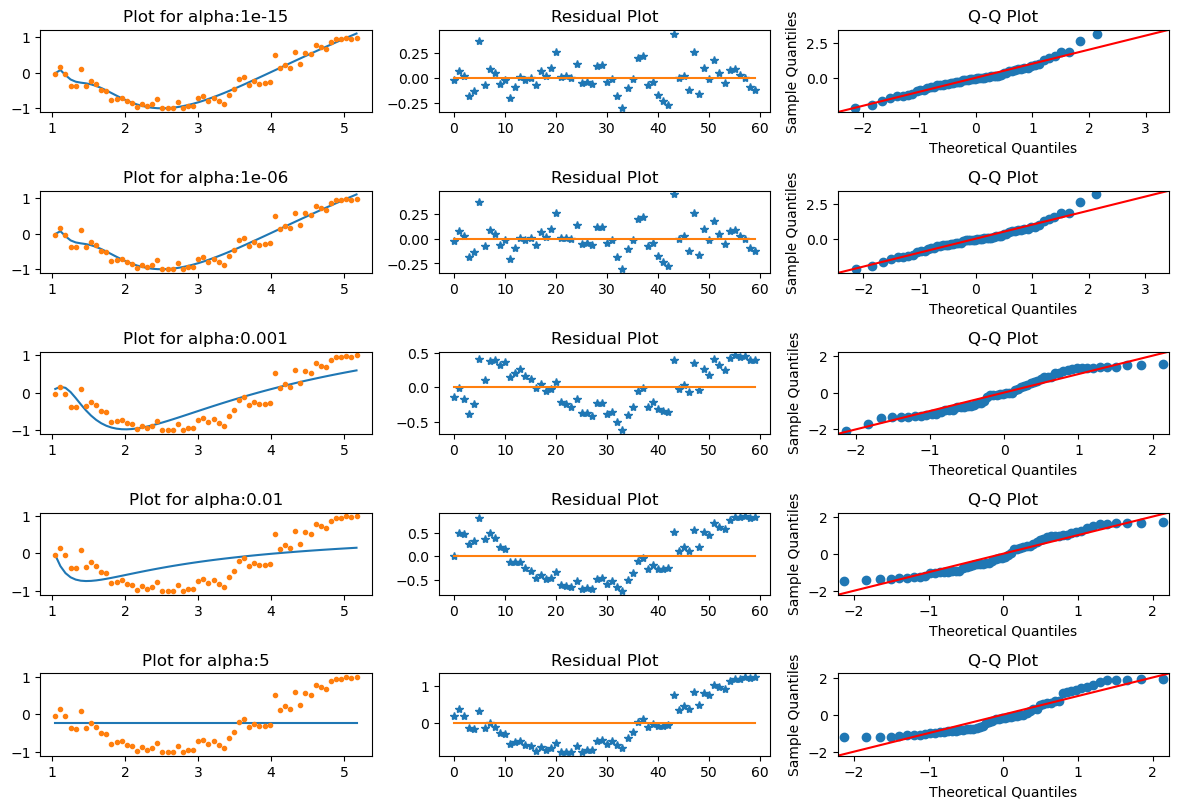

In [21]:
#initialize predictors to be set of 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range (2,16)])
#Set the different values of alpha to be tested
alpha_lasso=[1e-15,1e-6,1e-3,1e-2,5]
#Initialise the dataframe for storing coefficients.
col=['rss','intercept']+['coef_x%d'%i for i in range(1,16)]
ind=['alpha_%.2g'%alpha_lasso[i] for i in range (len(alpha_lasso))]
coef_matrix_lasso=pd.DataFrame(index=ind,columns=col)
models_to_plot={1e-15:(5,3,1),1e-6:(5,3,4),1e-3:(5,3,7),1e-2:(5,3,10),5:(5,3,13)}
for i in range(len(alpha_lasso)):
    coef_matrix_lasso.iloc[i,]=lasso_regression(data,predictors,alpha_lasso[i],models_to_plot)

In [22]:
coef_matrix_lasso

,rss,intercept,coef_x1,coef_x2,coef_x3,coef_x4,coef_x5,coef_x6,coef_x7,coef_x8,coef_x9,coef_x10,coef_x11,coef_x12,coef_x13,coef_x14,coef_x15
alpha_1e-15,-42,16,-62,-3,0.35,11,23,29,23,0.65,-30,-48,-29,24,55,-50,-7.9
alpha_1e-06,-42,2,-32,-0,0,0,12,32,23,5.3,-11,-55,-25,21,66,-50,6.3
alpha_0.001,-42,2.7,-0,-0,-0,-0,-0,-10,-0.28,-0,-0,-0,0,12,0,-11,0
alpha_0.01,-42,1.1,0,0,0,0,0,0,0,0,0,0,0,0,0,-3.2,-0.38
alpha_5,-42,-0.24,0,0,0,0,0,0,0,0,0,-0,-0,-0,-0,-0,0


#### 4. Multi Variate Regression

In [23]:
num_features=3
x=np.array([[i*np.pi/90 for i in range(60,300,4)],[i*np.pi/180 for i in range(60,300,4)],[i/5 for i in range(60)]]).T
y=2*x[:,0]+x[:,1]**2+5*np.sin(x[:,2])+np.random.normal(0,0.2,len(x))
data=pd.DataFrame(x,columns=[f"f{i}" for i in range (num_features)])
data['y']=y
data.head()

,f0,f1,f2,y
0,2.1,1,0,5.4
1,2.2,1.1,0.2,6.4
2,2.4,1.2,0.4,8.1
3,2.5,1.3,0.6,9.7
4,2.7,1.3,0.8,11


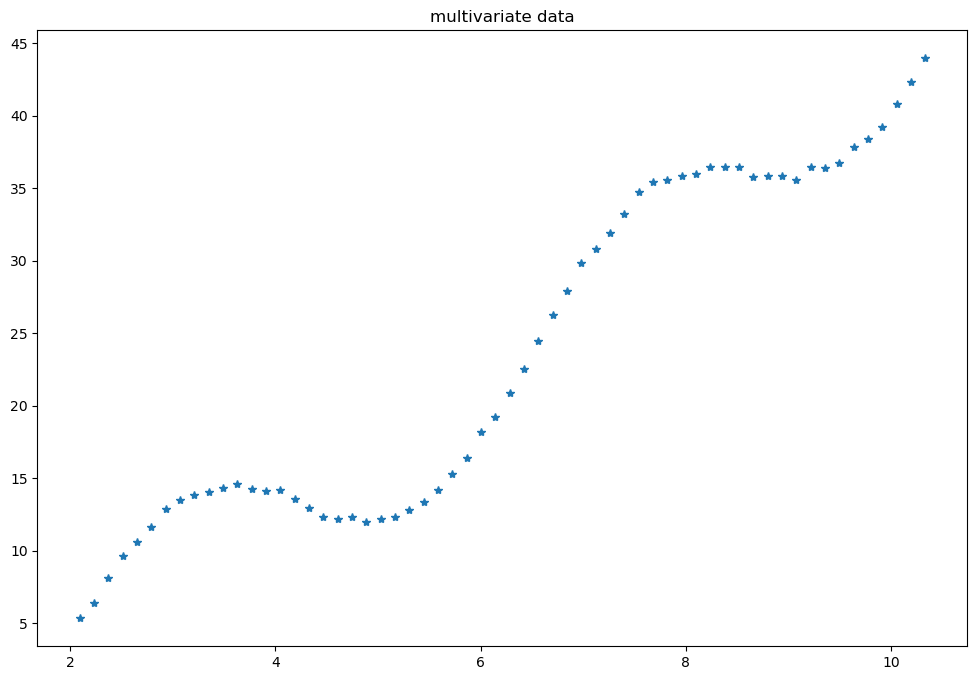

In [24]:
plt.title("multivariate data")
plt.plot(data['f0'],data['y'],"*")

In [25]:
def linear_regression(data,predictors):
    #Fit the model
    linreg=LinearRegression()
    linreg.fit(data[predictors],data['y'])
    y_pred=linreg.predict(data[predictors])
    # check if a plot is to be made for the given power of features
    plt.subplot(1,3,1)
    plt.tight_layout()
    plt.plot(data['f0'],y_pred)
    plt.plot(data['f0'],data['y'],'.')
    plt.title("prediction plot")
    plt.subplot(1,3,2)
    plt.tight_layout()
    xlen=np.arange(y_pred.shape[0])
    plt.plot(xlen,data['y']-y_pred,'.')
    plt.plot(xlen,0*xlen,'-')
    plt.title('Residual Plot')
    
    ax=plt.subplot(1,3,3)
    plt.tight_layout()
    sm.qqplot(data['y']-y_pred,line='45',fit=True,dist=stats.norm,ax=ax)
    plt.title('Q-Q Plot')
    
    #Return the result in pre-defined format
    rss=sum((y_pred-data['y'])**2)
    rss=[rss]
    rss.extend([linreg.intercept_])
    rss.extend(linreg.coef_)
    return rss

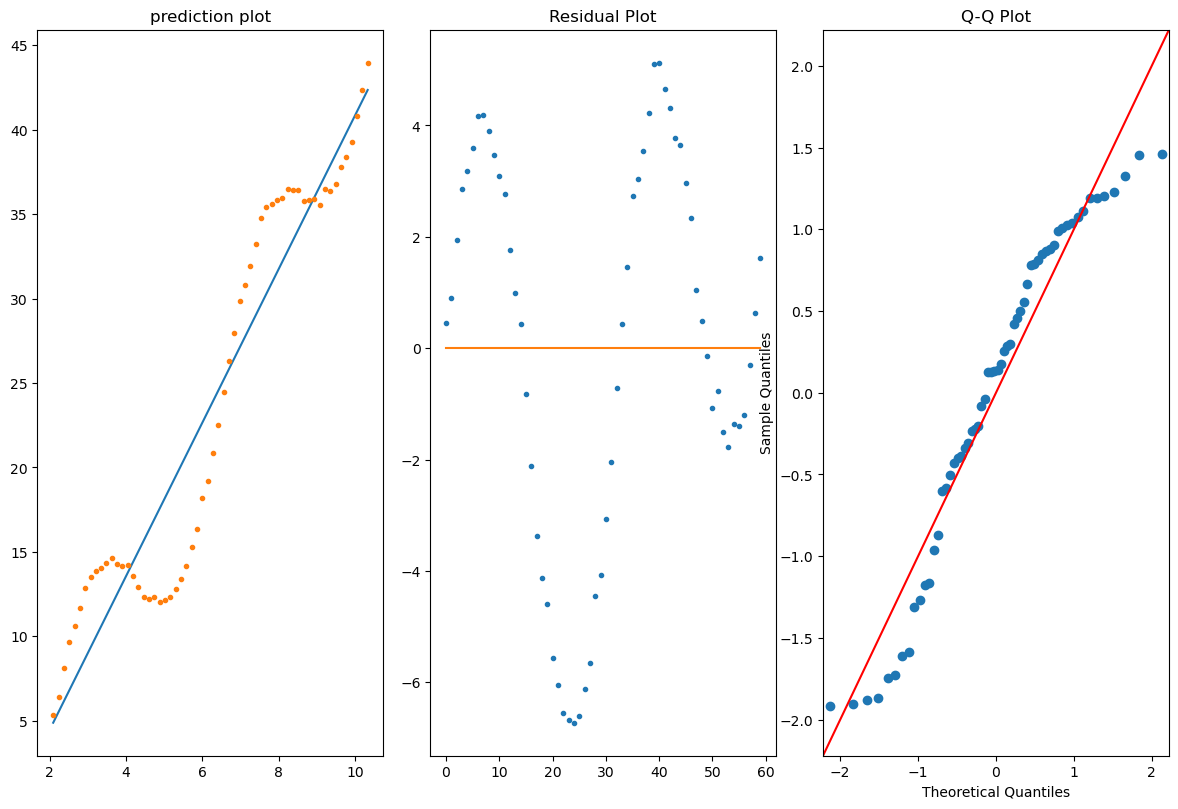

In [26]:
predictors=[f"f{i}" for i in range(num_features)]
_=linear_regression(data,predictors)

In [27]:
from sklearn.preprocessing import PolynomialFeatures

In [28]:
predictors=[f"f{i}" for i in range(num_features)]
num_poly_features=20
poly=PolynomialFeatures(num_poly_features)
x_poly=poly.fit_transform(data[predictors])
# example for 2 features :f0,f1,f2,f0^2,f1^2,f2^2,f0f1,f1f2,f2f0, bias
x_poly.shape

(60, 1771)

In [29]:
new_predictors=['bias']+[f'f{i-1}' for i in range(1,x_poly.shape[1])]
new_data=pd.DataFrame(x_poly,columns=new_predictors)
new_data['y']=data['y']

In [30]:
new_data[new_predictors].head()

,bias,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f1760,f1761,f1762,f1763,f1764,f1765,f1766,f1767,f1768,f1769
0,1,2.1,1,0,4.4,2.2,0,1.1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2.2,1.1,0.2,5,2.5,0.45,1.2,0.22,0.04,...,5.5e-08,9.9e-09,1.8e-09,3.2e-10,5.7e-11,1e-11,1.8e-12,3.3e-13,5.9e-14,1e-14
2,1,2.4,1.2,0.4,5.6,2.8,0.95,1.4,0.47,0.16,...,0.0002,6.6e-05,2.2e-05,7.5e-06,2.5e-06,8.5e-07,2.9e-07,9.7e-08,3.3e-08,1.1e-08
3,1,2.5,1.3,0.6,6.3,3.2,1.5,1.6,0.75,0.36,...,0.028,0.014,0.0065,0.0031,0.0015,0.0007,0.00034,0.00016,7.7e-05,3.7e-05
4,1,2.7,1.3,0.8,7,3.5,2.1,1.8,1.1,0.64,...,1.1,0.66,0.4,0.24,0.14,0.087,0.053,0.032,0.019,0.012


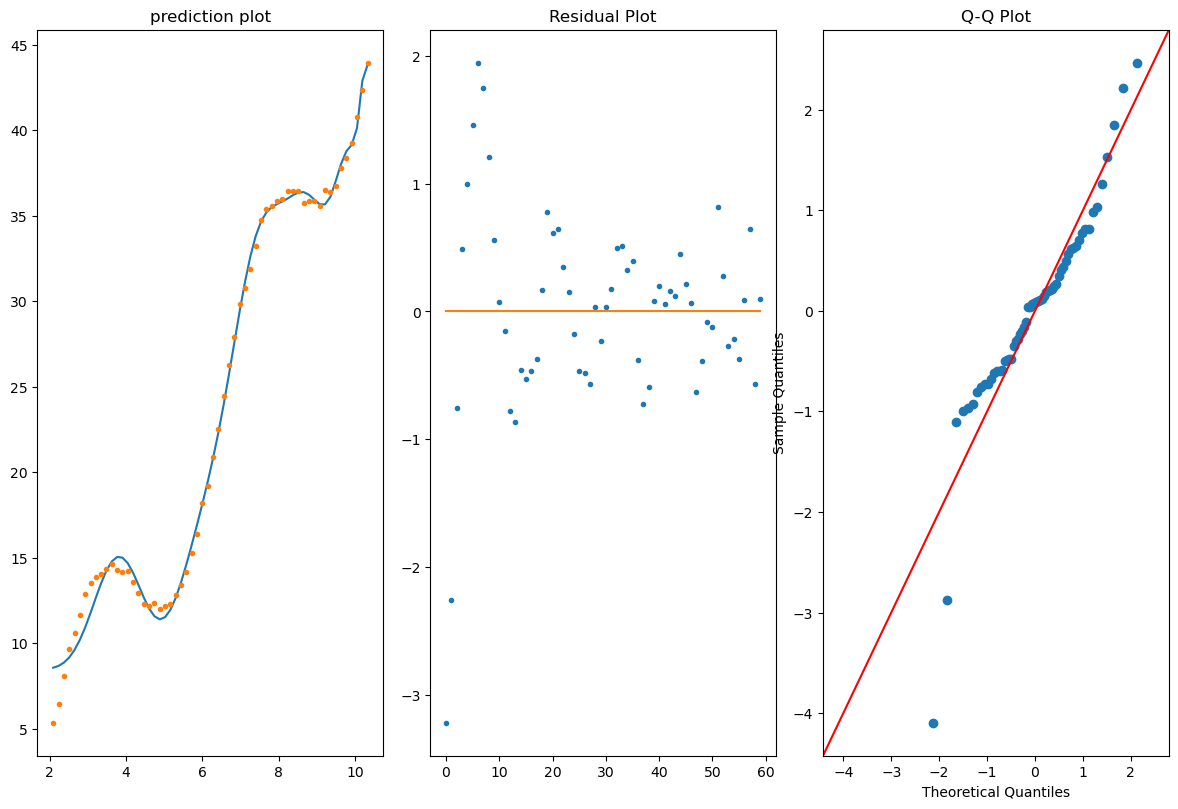

In [31]:
_=linear_regression(new_data,new_predictors)

In [32]:
######### trying..........
predictors=[f"f{i}" for i in range(num_features)]
num_poly_features=10
poly=PolynomialFeatures(num_poly_features)
x_poly=poly.fit_transform(data[predictors])
# example for 2 features :f0,f1,f2,f0^2,f1^2,f2^2,f0f1,f1f2,f2f0, bias
x_poly.shape

(60, 286)

In [33]:
new_predictors=['bias']+[f'f{i-1}' for i in range(1,x_poly.shape[1])]
new_data=pd.DataFrame(x_poly,columns=new_predictors)
new_data['y']=data['y']

In [34]:
new_data[new_predictors].head()

,bias,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f275,f276,f277,f278,f279,f280,f281,f282,f283,f284
0,1,2.1,1,0,4.4,2.2,0,1.1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2.2,1.1,0.2,5,2.5,0.45,1.2,0.22,0.04,...,0.54,0.097,0.017,0.0031,0.00056,0.0001,1.8e-05,3.2e-06,5.7e-07,1e-07
2,1,2.4,1.2,0.4,5.6,2.8,0.95,1.4,0.47,0.16,...,1.9,0.63,0.21,0.072,0.024,0.0081,0.0027,0.00092,0.00031,0.0001
3,1,2.5,1.3,0.6,6.3,3.2,1.5,1.6,0.75,0.36,...,4.7,2.2,1.1,0.51,0.24,0.12,0.056,0.027,0.013,0.006
4,1,2.7,1.3,0.8,7,3.5,2.1,1.8,1.1,0.64,...,10,6.1,3.7,2.2,1.3,0.81,0.49,0.3,0.18,0.11


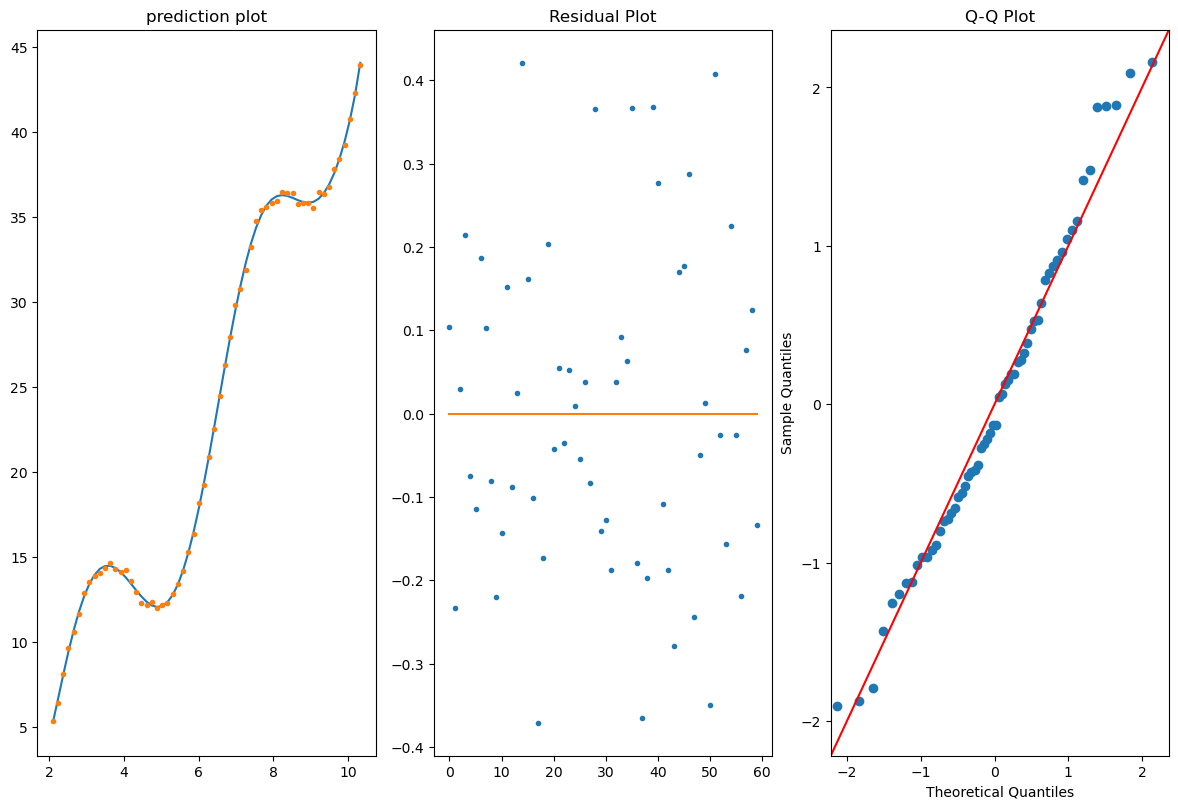

In [35]:
_=linear_regression(new_data,new_predictors)

In [36]:
predictors=[f"f{i}" for i in range(num_features)]
num_poly_features=15
poly=PolynomialFeatures(num_poly_features)
x_poly=poly.fit_transform(data[predictors])
# example for 2 features :f0,f1,f2,f0^2,f1^2,f2^2,f0f1,f1f2,f2f0, bias
x_poly.shape

(60, 816)

In [37]:
new_predictors=['bias']+[f'f{i-1}' for i in range(1,x_poly.shape[1])]
new_data=pd.DataFrame(x_poly,columns=new_predictors)
new_data['y']=data['y']

In [38]:
new_data[new_predictors].head()

,bias,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f805,f806,f807,f808,f809,f810,f811,f812,f813,f814
0,1,2.1,1,0,4.4,2.2,0,1.1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2.2,1.1,0.2,5,2.5,0.45,1.2,0.22,0.04,...,0.00017,3.1e-05,5.6e-06,9.9e-07,1.8e-07,3.2e-08,5.7e-09,1e-09,1.8e-10,3.3e-11
2,1,2.4,1.2,0.4,5.6,2.8,0.95,1.4,0.47,0.16,...,0.019,0.0064,0.0022,0.00073,0.00025,8.3e-05,2.8e-05,9.5e-06,3.2e-06,1.1e-06
3,1,2.5,1.3,0.6,6.3,3.2,1.5,1.6,0.75,0.36,...,0.36,0.17,0.083,0.04,0.019,0.009,0.0043,0.0021,0.00098,0.00047
4,1,2.7,1.3,0.8,7,3.5,2.1,1.8,1.1,0.64,...,3.3,2,1.2,0.73,0.44,0.27,0.16,0.097,0.058,0.035


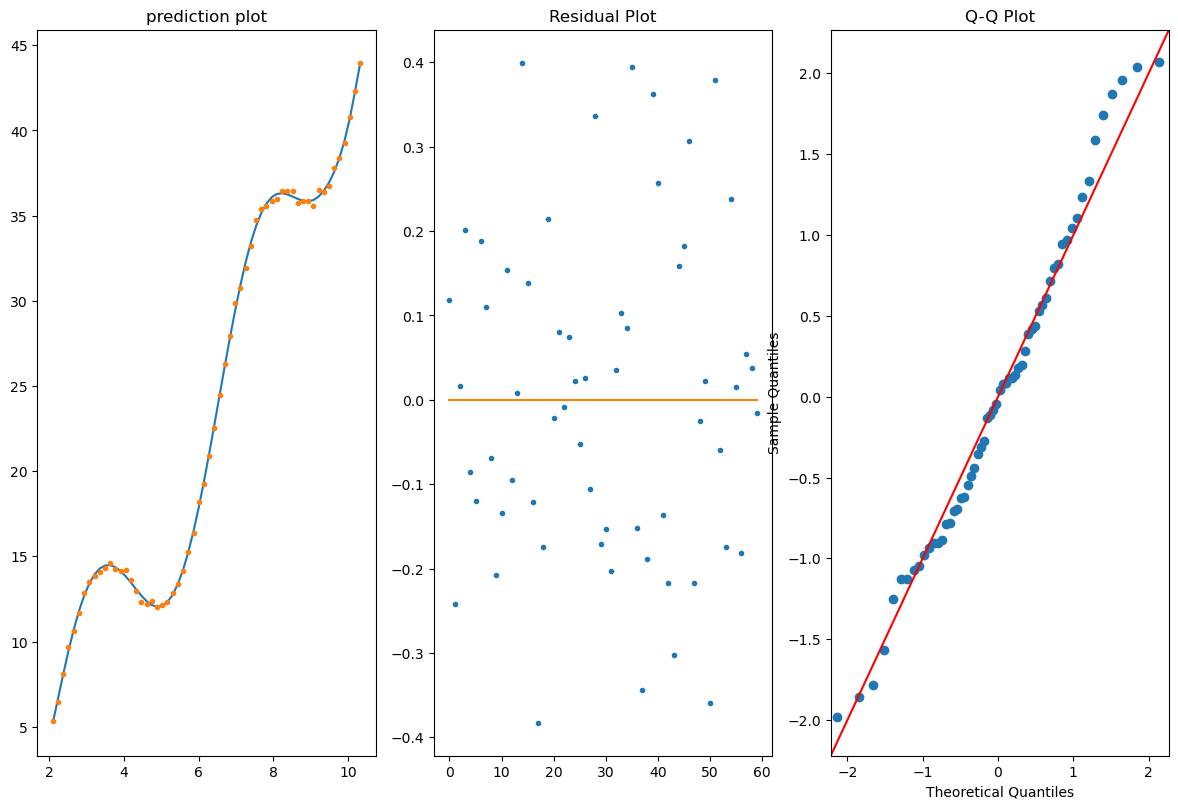

In [39]:
_=linear_regression(new_data,new_predictors)

In [40]:
######### trying..........
predictors=[f"f{i}" for i in range(num_features)]
num_poly_features=8
poly=PolynomialFeatures(num_poly_features)
x_poly=poly.fit_transform(data[predictors])
# example for 2 features :f0,f1,f2,f0^2,f1^2,f2^2,f0f1,f1f2,f2f0, bias
x_poly.shape

(60, 165)

In [41]:
new_predictors=['bias']+[f'f{i-1}' for i in range(1,x_poly.shape[1])]
new_data=pd.DataFrame(x_poly,columns=new_predictors)
new_data['y']=data['y']

In [42]:
new_data[new_predictors].head()

,bias,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163
0,1,2.1,1,0,4.4,2.2,0,1.1,0,0,...,0,1.4,0,0,0,0,0,0,0,0
1,1,2.2,1.1,0.2,5,2.5,0.45,1.2,0.22,0.04,...,2.9e-05,2.4,0.43,0.078,0.014,0.0025,0.00045,8e-05,1.4e-05,2.6e-06
2,1,2.4,1.2,0.4,5.6,2.8,0.95,1.4,0.47,0.16,...,0.0039,3.9,1.3,0.45,0.15,0.051,0.017,0.0058,0.0019,0.00066
3,1,2.5,1.3,0.6,6.3,3.2,1.5,1.6,0.75,0.36,...,0.07,6.2,3,1.4,0.68,0.32,0.15,0.074,0.035,0.017
4,1,2.7,1.3,0.8,7,3.5,2.1,1.8,1.1,0.64,...,0.56,9.6,5.8,3.5,2.1,1.3,0.76,0.46,0.28,0.17


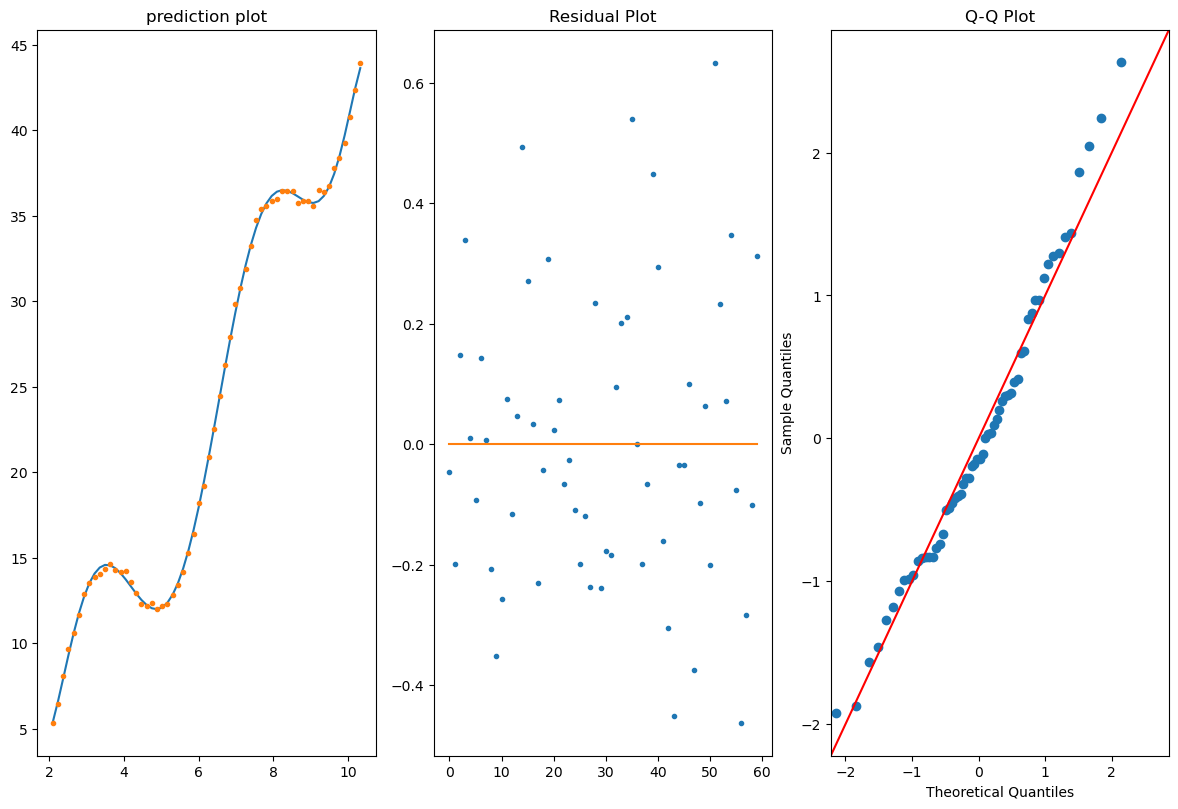

In [43]:
_=linear_regression(new_data,new_predictors)